# **Importing the Dependencies**

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import joblib
import pickle

In [94]:
import warnings
warnings.filterwarnings("ignore")

# **Loading the CSV File into the dataFrame**

In [95]:
df = pd.read_csv('/Users/vanshjain/Desktop/ai-ml-dev/proj-01/telco.csv')

In [96]:
# Preview the first 5 rows

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [97]:
# Basic info about columns and datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [98]:
# Statistics Summary

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [99]:
# Checking for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [100]:
df['Churn'].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [101]:
df['Churn'].value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [102]:
df.shape

(7043, 21)

<Axes: >

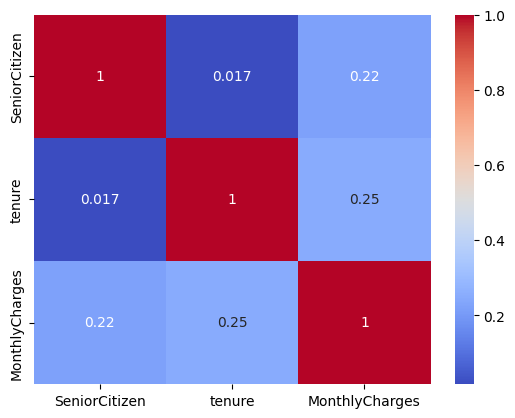

In [103]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

# **Data Cleaning and Preprocessing**

In [104]:
#useless feature dropped

df.drop('customerID', axis=1, inplace=True)

In [105]:
#TotalCharges is object but should be float. hence converting to float

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])  # remove rows with invalid/missing TotalCharges


In [106]:
 #encoding categorical variables: yes = 1 / no = 0


binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [107]:
# Convert selected categorical columns into numerical dummy variables using one-hot encoding.
# This converts each category into a binary feature (0/1), and 'drop_first=True' avoids the dummy variable trap.

multi_cols = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',
              'OnlineBackup', 'DeviceProtection', 'TechSupport',
              'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=multi_cols, drop_first=True)

In [108]:
print(df.dtypes)

SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
gender_Male                                 bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No inter

In [109]:
print(df.shape)

(7032, 31)


# **Save Feature Names for Consistent Prediction**


In [110]:
#Saving feature names after preprocessing for later use during prediction
feature_names = df.drop('Churn', axis=1).columns.tolist()
with open("feature_names.pkl", "wb") as f:
    pickle.dump(feature_names, f)

# **Training the Model**

In [111]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [112]:
#Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [113]:
#training the model

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
rf = RandomForestClassifier()
log_reg = LogisticRegression(max_iter=1000)


In [114]:
xgb.fit(X_train, y_train)
rf.fit(X_train, y_train)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [115]:
#Predicting

y_pred_xgb = xgb.predict(X_test)    
y_pred_rf = rf.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)


In [116]:
# Accuracy

print("Accuracy of XGBoost:", accuracy_score(y_test, y_pred_xgb))
print("Accuracy of Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Accuracy of Logistic Regression:", accuracy_score(y_test, y_pred_log_reg))


Accuracy of XGBoost: 0.7782515991471215
Accuracy of Random Forest: 0.7874911158493249
Accuracy of Logistic Regression: 0.8024164889836531


In [117]:
# RandomizedSearchCV for Logistic Regression
from sklearn.model_selection import RandomizedSearchCV

param_dist_lr = {
    "C": np.logspace(-3, 2, 6),
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"],
    "class_weight": [None, "balanced"]
}

rand_log_reg = RandomizedSearchCV(
    log_reg, param_distributions=param_dist_lr, 
    n_iter=20, cv=5, scoring="accuracy", n_jobs=-1, random_state=42, verbose=0
)
rand_log_reg.fit(X_train, y_train)



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The ma

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                                        'class_weight': [None, 'balanced'],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='accuracy')

In [118]:
# RandomizedSearchCV for Random Forest
param_dist_rf = {
    "n_estimators": np.arange(100, 600, 100),
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": np.arange(2, 11, 2),
    "min_samples_leaf": np.arange(1, 5),
    "max_features": ["sqrt", "log2"],
    "class_weight": [None, "balanced"]
}

rand_rf = RandomizedSearchCV(
    rf, param_distributions=param_dist_rf,
    n_iter=30, cv=5, scoring="accuracy", n_jobs=-1, random_state=42, verbose=0
)
rand_rf.fit(X_train, y_train)



RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'max_depth': [None, 5, 10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10]),
                                        'n_estimators': array([100, 200, 300, 400, 500])},
                   random_state=42, scoring='accuracy')

In [119]:
# RandomizedSearchCV for XGBoost
param_dist_xgb = {
    "n_estimators": np.arange(100, 500, 100),
    "max_depth": [3, 5, 7],
    "learning_rate": np.linspace(0.01, 0.3, 5),
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0],
    "gamma": [0, 1, 5],
    "scale_pos_weight": [1, sum(y_train==0)/sum(y_train==1)]
}

rand_xgb = RandomizedSearchCV(
    xgb, param_distributions=param_dist_xgb,
    n_iter=30, cv=5, scoring="accuracy", n_jobs=-1, random_state=42, verbose=0
)
rand_xgb.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:46:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:46:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:46:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:46:12] WARN

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': array([0.01  , 0.0825, 0.155 , 0.2275, 0.3   ]),
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': array([100, 200, 300, 400]),
                                        'scale_pos_weight': [1,
                                                             2.762541806020067],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='accuracy')

In [122]:
# Collect results into a DataFrame
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Best Params": [rand_log_reg.best_params_, rand_rf.best_params_, rand_xgb.best_params_],
    "Best CV Accuracy": [rand_log_reg.best_score_, rand_rf.best_score_, rand_xgb.best_score_]
})

print(results)

                 Model                                        Best Params  \
0  Logistic Regression  {'solver': 'liblinear', 'penalty': 'l2', 'clas...   
1        Random Forest  {'n_estimators': 400, 'min_samples_split': 2, ...   
2              XGBoost  {'subsample': 0.7, 'scale_pos_weight': 1, 'n_e...   

   Best CV Accuracy  
0          0.804622  
1          0.803022  
2          0.802311  


Logistic Regression model seems the best option so choosing that going forward. 

In [123]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = rand_log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, rand_log_reg.predict_proba(X_test)[:, 1]))

Accuracy: 0.7981520966595593
Precision: 0.6355421686746988
Recall: 0.5641711229946524
F1 Score: 0.5977337110481586
ROC AUC: 0.8362370645697337


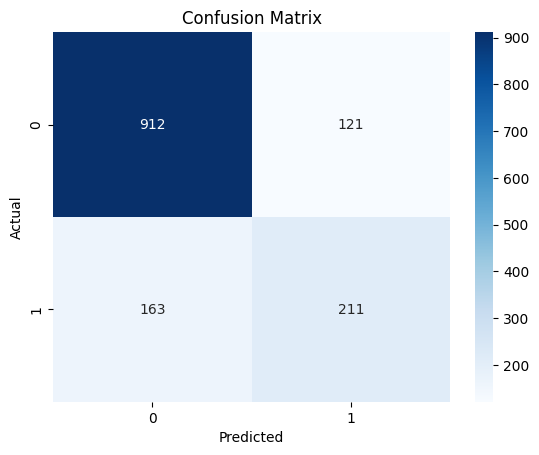

In [124]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, rand_log_reg.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [125]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": rand_log_reg.best_estimator_.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(coeff_df)

                                  Feature  Coefficient
11            InternetService_Fiber optic     0.652051
9          MultipleLines_No phone service     0.337181
5                        PaperlessBilling     0.318021
28         PaymentMethod_Electronic check     0.299171
10                      MultipleLines_Yes     0.285359
0                           SeniorCitizen     0.213638
22                        StreamingTV_Yes     0.189623
24                    StreamingMovies_Yes     0.156395
29             PaymentMethod_Mailed check     0.053875
6                          MonthlyCharges     0.004857
1                                 Partner     0.000359
7                            TotalCharges     0.000297
8                             gender_Male    -0.023231
18                   DeviceProtection_Yes    -0.034727
27  PaymentMethod_Credit card (automatic)    -0.035787
3                                  tenure    -0.058876
23    StreamingMovies_No internet service    -0.102295
21        

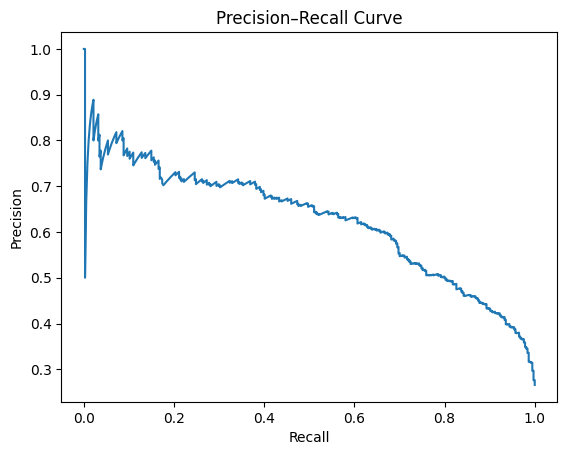

In [126]:
from sklearn.metrics import precision_recall_curve

y_prob = rand_log_reg.predict_proba(X_test)[:, 1]
prec, rec, thresh = precision_recall_curve(y_test, y_prob)

plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()

In [127]:
joblib.dump(rand_log_reg, "/Users/vanshjain/Desktop/ai-ml-dev/proj-01/lg_churn.pkl")

['/Users/vanshjain/Desktop/ai-ml-dev/proj-01/lg_churn.pkl']